In [2]:
import sys
from pathlib import Path

# Add project root to Python path
PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

print("Project root added:", PROJECT_ROOT)


Project root added: /Users/diegomikael/drawdown-risk-analysis


In [3]:
import pandas as pd
from src.data import fetch_adj_close
from src.risk import extract_drawdown_events

In [4]:
prices = fetch_adj_close()

all_events = []
summary_rows = []

for ticker in prices.columns:
    s = prices[ticker].dropna()
    events = extract_drawdown_events(s)
    events["ticker"] = ticker
    all_events.append(events)

    if events.empty:
        summary_rows.append({
            "ticker": ticker,
            "n_events": 0,
            "worst_depth": None,
            "longest_total_days": None,
            "avg_depth": None,
        })
        continue

    summary_rows.append({
        "ticker": ticker,
        "n_events": int(len(events)),
        "worst_depth": float(events["depth"].min()),
        "longest_total_days": float(
            events.loc[events["recovered"], "total_days"].max()
        ),
        "avg_depth": float(events["depth"].mean()),
    })

events_all = pd.concat(all_events, ignore_index=True)
summary = pd.DataFrame(summary_rows).sort_values("worst_depth")

summary


Failed to get ticker 'GLD' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'TLT' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'QQQ' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'IWM' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'SPY' reason: Expecting value: line 1 column 1 (char 0)

5 Failed downloads:
['GLD', 'TLT', 'QQQ', 'IWM', 'SPY']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


,ticker,n_events,worst_depth,longest_total_days,avg_depth
2,IWM,140,-0.598941,1388.0,-0.037310
0,SPY,294,-0.564733,1935.0,-0.017727
1,QQQ,266,-0.534020,1136.0,-0.027225
3,TLT,49,-0.483507,1089.0,-0.054905
4,GLD,120,-0.455550,3264.0,-0.029637


In [5]:
from pathlib import Path

Path("outputs").mkdir(exist_ok=True)

summary.to_csv("outputs/summary_by_asset.csv", index=False)
events_all.to_csv("outputs/drawdown_events_all.csv", index=False)
prices.to_csv("outputs/prices_used.csv")


Matplotlib is building the font cache; this may take a moment.


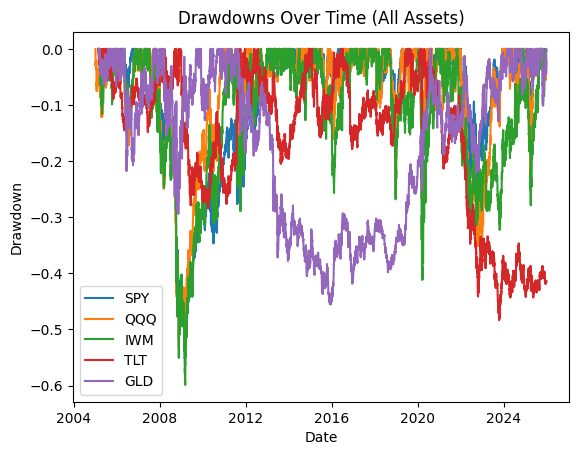

In [6]:
import matplotlib.pyplot as plt
from src.risk import compute_drawdown

plt.figure()

for ticker in prices.columns:
    dd = compute_drawdown(prices[ticker].dropna())
    plt.plot(dd.index, dd["drawdown"], label=ticker)

plt.title("Drawdowns Over Time (All Assets)")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.legend()
plt.show()


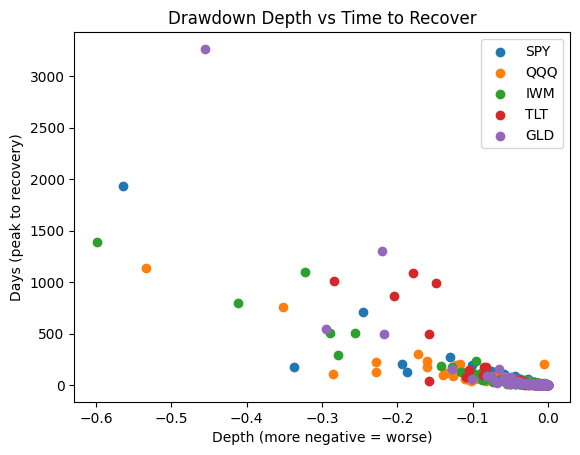

In [7]:
import matplotlib.pyplot as plt

recovered = events_all[events_all["recovered"] == True].copy()

plt.figure()
for ticker in recovered["ticker"].unique():
    sub = recovered[recovered["ticker"] == ticker]
    plt.scatter(sub["depth"], sub["total_days"], label=ticker)

plt.title("Drawdown Depth vs Time to Recover")
plt.xlabel("Depth (more negative = worse)")
plt.ylabel("Days (peak to recovery)")
plt.legend()
plt.show()


In [8]:
worst5_each = (
    events_all.sort_values("depth")
    .groupby("ticker")
    .head(5)
    .loc[:, ["ticker", "peak_date", "trough_date", "recovery_date", "depth", "total_days"]]
)

worst5_each


,ticker,peak_date,trough_date,recovery_date,depth,total_days
594,IWM,2007-07-09,2009-03-09,2011-04-27,-0.598941,1388.0
42,SPY,2007-10-09,2009-03-09,2013-01-25,-0.564733,1935.0
320,QQQ,2007-10-31,2008-11-20,2010-12-10,-0.534020,1136.0
748,TLT,2020-08-04,2023-10-19,NaT,-0.483507,NaN
825,GLD,2011-08-22,2015-12-17,2020-07-29,-0.455550,3264.0
674,IWM,2018-08-31,2020-03-23,2020-11-09,-0.411324,801.0
522,QQQ,2021-11-19,2022-11-03,2023-12-13,-0.351197,754.0
191,SPY,2020-02-19,2020-03-23,2020-08-10,-0.337154,173.0
692,IWM,2021-11-08,2023-10-27,2024-11-11,-0.322669,1099.0
795,GLD,2008-03-17,2008-11-12,2009-09-16,-0.294141,548.0


In [9]:
worst5_each.to_csv("outputs/worst5_events_by_asset.csv", index=False)
